In [36]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [37]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [38]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [39]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [40]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables

Base.prepare(engine, reflect=True)

In [41]:
# View all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [42]:
# Save references to each table

measurement = Base.classes.measurement
station = Base.classes.station

In [43]:

# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [44]:
# Find the most recent date in the data set.

start_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
start_date

('2017-08-23',)

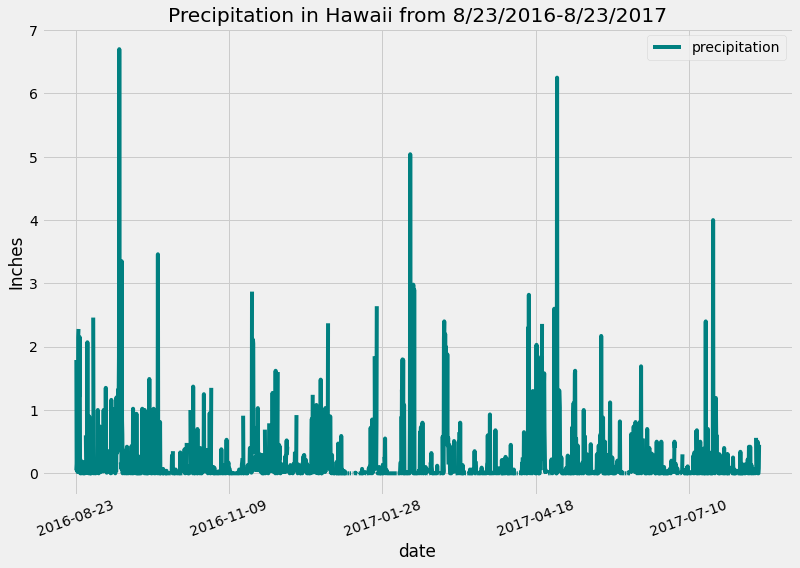

In [45]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

recent_date = dt.date(2017,8, 23)


# Calculate the date one year from the last date in data set.

previous_year =  recent_date - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores

query = session.query(measurement.date, measurement.prcp).filter(measurement.date >= previous_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

precipitation_df = pd.DataFrame(query)

precipitation_df = precipitation_df.rename(columns = {'prcp': 'precipitation'})

precipitation_df = precipitation_df.set_index('date')

# Sort the dataframe by date

precipitation_df = precipitation_df.sort_values(by=['date'])

# Use Pandas Plotting with Matplotlib to plot the data

precipitation_df.plot(title = "Precipitation in Hawaii from 8/23/2016-8/23/2017",color= "teal", ylabel= "Inches", rot = 20, figsize = (12,8))

plt.show()


In [46]:
# Use Pandas to calcualte the summary statistics for the precipitation data

precipitation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [47]:
# Design a query to calculate the total number stations in the dataset

total_number_stations = session.query(measurement.station).distinct().count()
total_number_stations

9

In [48]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

most_active_stations = session.query(measurement.station, func.count(
    measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [49]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

lowest_temp = session.query(func.min(measurement.tobs)).filter(measurement.station == most_active_stations[0][0]).all()

highest_temp = session.query(func.max(measurement.tobs)).filter(measurement.station == most_active_stations[0][0]).all()

avg_temp = session.query(func.avg(measurement.tobs)).filter(measurement.station == most_active_stations[0][0]).all()

print(f'The lowest temperature is {lowest_temp}, the highest is {highest_temp}, and the average is {avg_temp}')

The lowest temperature is [(54.0,)], the highest is [(85.0,)], and the average is [(71.66378066378067,)]


Text(0.5, 1.0, 'Temperatures for the last 12 months')

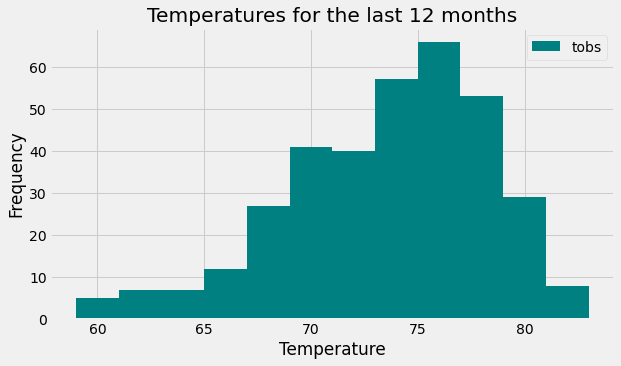

In [50]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

last_year = session.query(measurement.date, measurement.tobs).filter_by(
    station = most_active_stations[0][0]).filter(measurement.date >= previous_year).all()

last_year_df = pd.DataFrame(last_year)

last_year_df.plot(kind = "hist", color= "teal", bins = 12, figsize=(9,5))
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperatures for the last 12 months')

# Close session

In [51]:
# Close Session
session.close()